In [2]:
pip install pyti


In [1]:
import pandas as pd
read_yfinance_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
finance_data = pd.DataFrame(read_yfinance_data)
print(finance_data.info(10))

from pyti.relative_strength_index import relative_strength_index as rsi
from pyti.moving_average_convergence_divergence import moving_average_convergence_divergence as macd
from pyti.simple_moving_average import simple_moving_average as sma
from pyti.on_balance_volume import on_balance_volume as obv

# Assuming 'finance_data' DataFrame is already loaded and contains the necessary columns.

# Extract relevant columns as lists
close_prices = finance_data['Close'].tolist()
high_prices = finance_data['High'].tolist()
low_prices = finance_data['Low'].tolist()
volume = finance_data['Volume'].tolist()


# 2. Calculate the MACD (12-period short EMA, 26-period long EMA)
macd_line = macd(close_prices, short_period=12, long_period=26)

# Calculate the 9-period signal line using SMA of the MACD line
signal_line = sma(macd_line, period=9)

# Calculate the MACD histogram
macd_histogram = [m - s for m, s in zip(macd_line, signal_line)]

# Add MACD values to the DataFrame
finance_data['MACD_Line'] = macd_line
finance_data['Signal_Line'] = signal_line
finance_data['MACD_Histogram'] = macd_histogram

# 3. Calculate Bollinger Bands manually
def calculate_bollinger_bands(df, period=20, num_std_dev=2):
    df['BB_Middle'] = df['Close'].rolling(window=period).mean()
    df['BB_Std_Dev'] = df['Close'].rolling(window=period).std()
    df['BB_Upper'] = df['BB_Middle'] + (df['BB_Std_Dev'] * num_std_dev)
    df['BB_Lower'] = df['BB_Middle'] - (df['BB_Std_Dev'] * num_std_dev)
    return df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB
None


In [1]:
pip install ta



  Using cached ta-0.11.0.tar.gz (25 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29423 sha256=7ecca2b0fc83865e2948635519340336041d67bbe62211b6d516d8f7ce424d4d
  Stored in directory: c:\users\craftsoft\appdata\local\pip\cache\wheels\5c\a1\5f\c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [1]:
pip install pyti matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


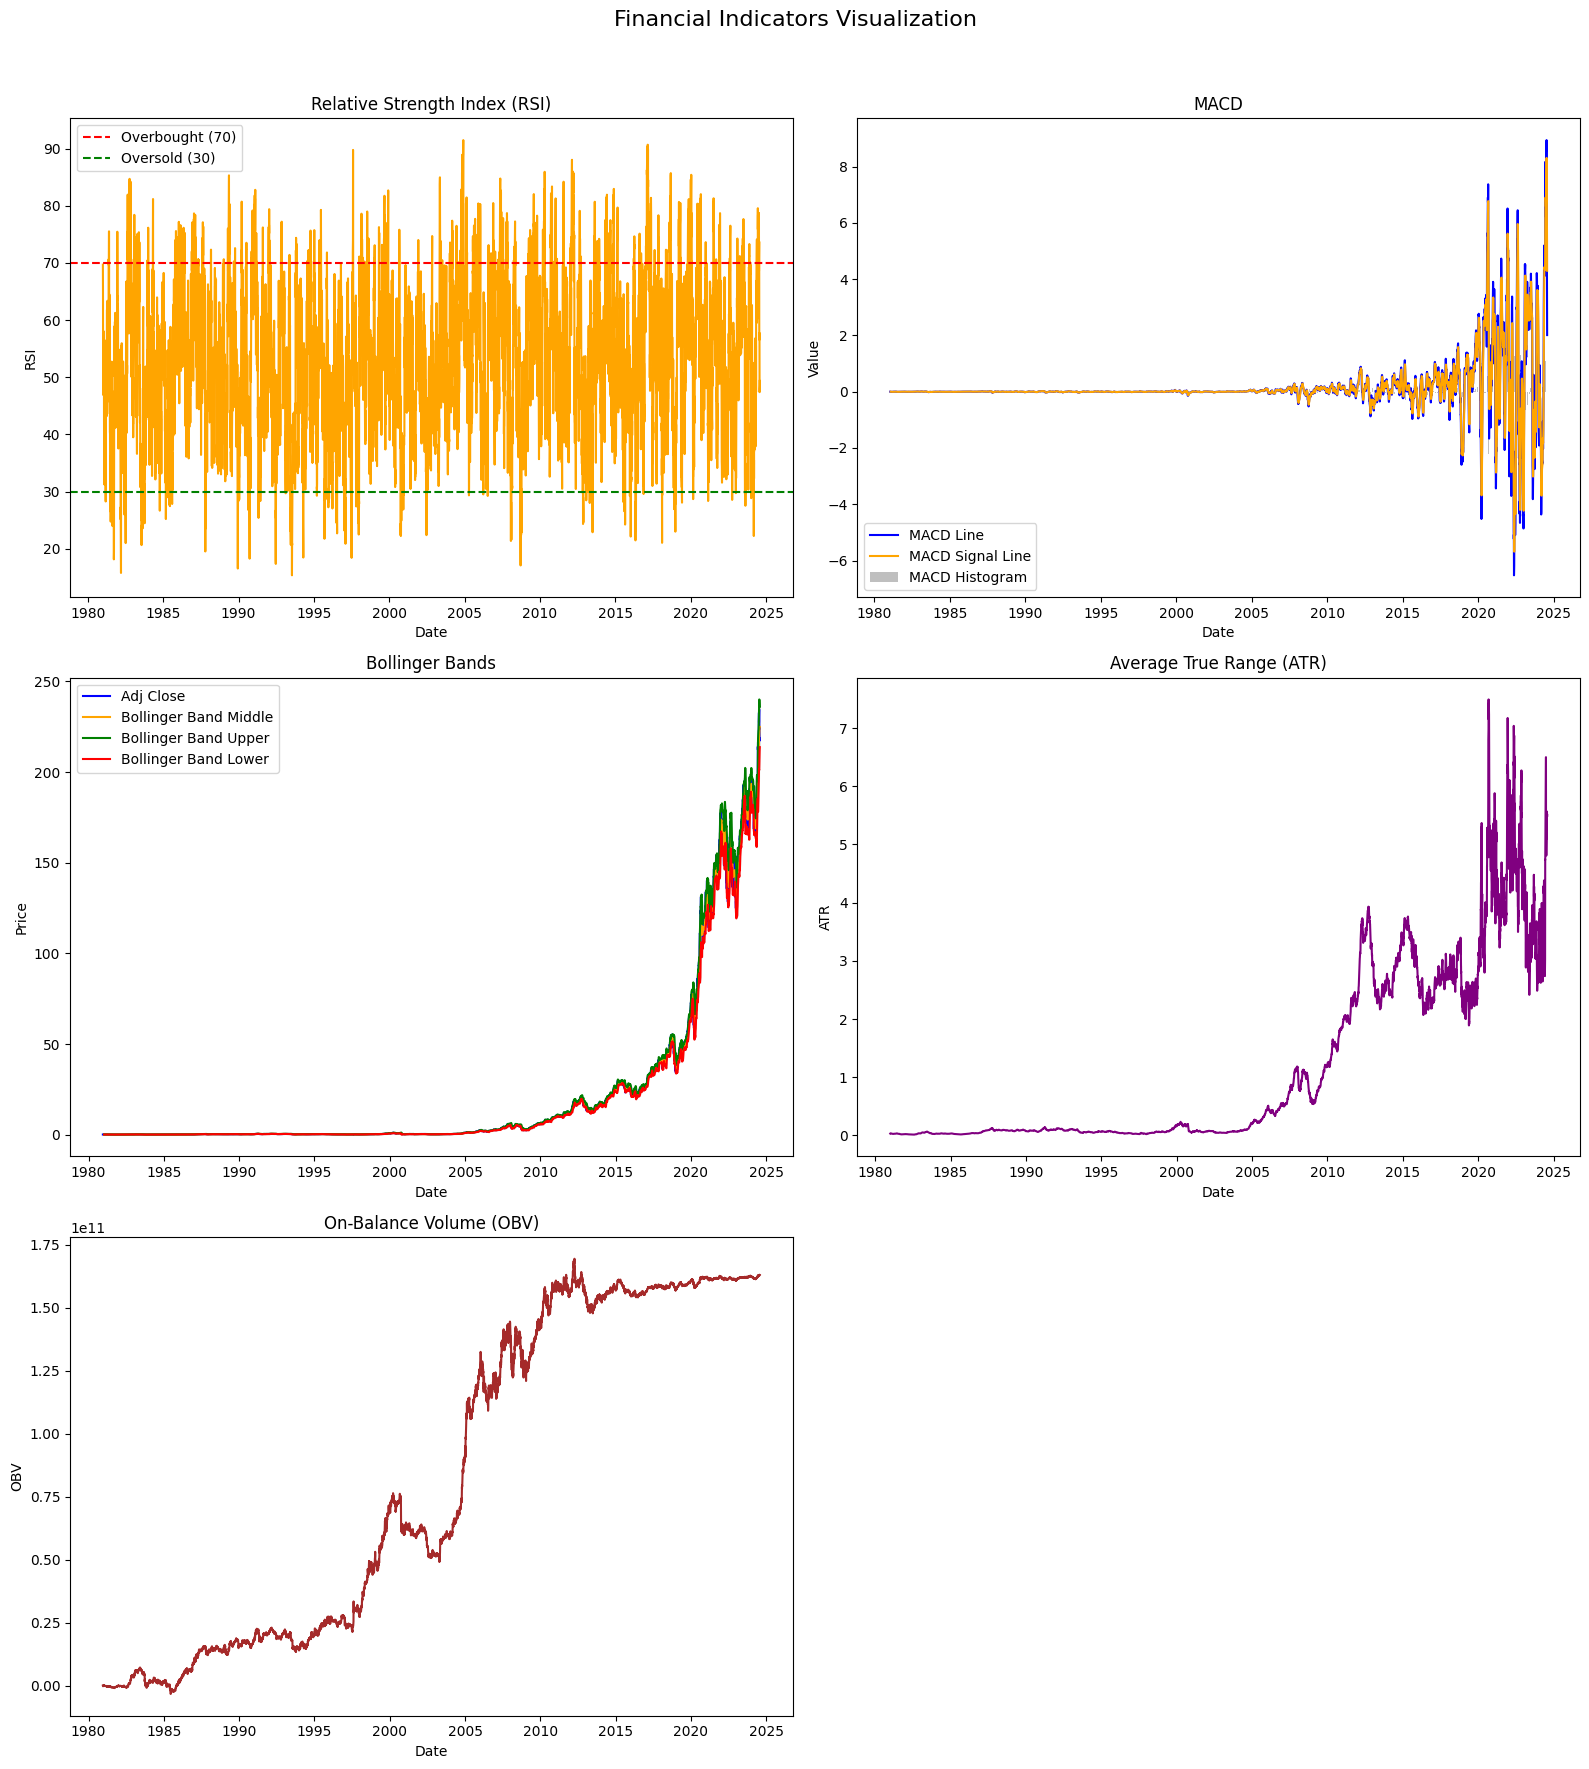

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ta

# Sample data preparation (replace with your actual data loading)
finance_data = pd.DataFrame({
    'Date': pd.date_range(start='2021-01-01', periods=100),
    'Adj Close': np.random.rand(100) * 100,
    'High': np.random.rand(100) * 100,
    'Low': np.random.rand(100) * 100,
    'Volume': np.random.randint(1000, 10000, size=100)
})

# Set Date as index
finance_data.set_index('Date', inplace=True)

# Calculate the 14-period Relative Strength Index (RSI)
finance_data['RSI_14'] = ta.momentum.RSIIndicator(finance_data['Adj Close'], window=14).rsi()

# Calculate Bollinger Bands
finance_data['BB_Middle'] = finance_data['Adj Close'].rolling(window=20).mean()
finance_data['BB_Std'] = finance_data['Adj Close'].rolling(window=20).std()
finance_data['BB_Upper'] = finance_data['BB_Middle'] + (finance_data['BB_Std'] * 2)
finance_data['BB_Lower'] = finance_data['BB_Middle'] - (finance_data['BB_Std'] * 2)

# Calculate the 14-period Average True Range (ATR)
high_low = finance_data['High'] - finance_data['Low']
high_close = (finance_data['High'] - finance_data['Adj Close'].shift()).abs()
low_close = (finance_data['Low'] - finance_data['Adj Close'].shift()).abs()
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
finance_data['ATR_14'] = true_range.rolling(window=14).mean()

# Calculate On-Balance Volume (OBV)
def calculate_obv(close, volume):
    obv = (volume * np.sign(close.diff())).fillna(0)
    return obv.cumsum()

finance_data['OBV'] = calculate_obv(finance_data['Adj Close'], finance_data['Volume'])

# Read and prepare actual data from CSV
# Ensure columns match those used above for calculations
read_yfinance_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
read_yfinance_data['Date'] = pd.to_datetime(read_yfinance_data['Date'])
read_yfinance_data.set_index('Date', inplace=True)

# Calculate indicators on the actual data
read_yfinance_data['RSI_14'] = ta.momentum.RSIIndicator(read_yfinance_data['Adj Close'], window=14).rsi()
read_yfinance_data['BB_Middle'] = read_yfinance_data['Adj Close'].rolling(window=20).mean()
read_yfinance_data['BB_Std'] = read_yfinance_data['Adj Close'].rolling(window=20).std()
read_yfinance_data['BB_Upper'] = read_yfinance_data['BB_Middle'] + (read_yfinance_data['BB_Std'] * 2)
read_yfinance_data['BB_Lower'] = read_yfinance_data['BB_Middle'] - (read_yfinance_data['BB_Std'] * 2)
high_low = read_yfinance_data['High'] - read_yfinance_data['Low']
high_close = (read_yfinance_data['High'] - read_yfinance_data['Adj Close'].shift()).abs()
low_close = (read_yfinance_data['Low'] - read_yfinance_data['Adj Close'].shift()).abs()
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
read_yfinance_data['ATR_14'] = true_range.rolling(window=14).mean()
read_yfinance_data['OBV'] = calculate_obv(read_yfinance_data['Adj Close'], read_yfinance_data['Volume'])

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
fig.suptitle('Financial Indicators Visualization', fontsize=16)

# Plot RSI (Relative Strength Index)
sns.lineplot(ax=axes[0, 0], x=read_yfinance_data.index, y=read_yfinance_data['RSI_14'], color='orange')
axes[0, 0].axhline(70, color='red', linestyle='--', label='Overbought (70)')
axes[0, 0].axhline(30, color='green', linestyle='--', label='Oversold (30)')
axes[0, 0].set_title('Relative Strength Index (RSI)')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('RSI')
axes[0, 0].legend()

# Plot MACD (Moving Average Convergence Divergence)
macd = ta.trend.MACD(read_yfinance_data['Adj Close'])
read_yfinance_data['MACD_Line'] = macd.macd()
read_yfinance_data['MACD_Signal'] = macd.macd_signal()
read_yfinance_data['MACD_Histogram'] = macd.macd_diff()

sns.lineplot(ax=axes[0, 1], x=read_yfinance_data.index, y=read_yfinance_data['MACD_Line'], color='blue', label='MACD Line')
sns.lineplot(ax=axes[0, 1], x=read_yfinance_data.index, y=read_yfinance_data['MACD_Signal'], color='orange', label='MACD Signal Line')
axes[0, 1].bar(read_yfinance_data.index, read_yfinance_data['MACD_Histogram'], color='grey', alpha=0.5, label='MACD Histogram')
axes[0, 1].set_title('MACD')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Value')
axes[0, 1].legend()

# Plot Bollinger Bands
sns.lineplot(ax=axes[1, 0], x=read_yfinance_data.index, y=read_yfinance_data['Adj Close'], color='blue', label='Adj Close')
sns.lineplot(ax=axes[1, 0], x=read_yfinance_data.index, y=read_yfinance_data['BB_Middle'], color='orange', label='Bollinger Band Middle')
sns.lineplot(ax=axes[1, 0], x=read_yfinance_data.index, y=read_yfinance_data['BB_Upper'], color='green', label='Bollinger Band Upper')
sns.lineplot(ax=axes[1, 0], x=read_yfinance_data.index, y=read_yfinance_data['BB_Lower'], color='red', label='Bollinger Band Lower')
axes[1, 0].fill_between(read_yfinance_data.index, read_yfinance_data['BB_Lower'], read_yfinance_data['BB_Upper'], color='grey', alpha=0.2)
axes[1, 0].set_title('Bollinger Bands')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price')
axes[1, 0].legend()

# Plot ATR (Average True Range)
sns.lineplot(ax=axes[1, 1], x=read_yfinance_data.index, y=read_yfinance_data['ATR_14'], color='purple')
axes[1, 1].set_title('Average True Range (ATR)')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('ATR')

# Plot OBV (On-Balance Volume)
sns.lineplot(ax=axes[2, 0], x=read_yfinance_data.index, y=read_yfinance_data['OBV'], color='brown')
axes[2, 0].set_title('On-Balance Volume (OBV)')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('OBV')

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
